# Principal Component Analysis on Pulsar Data
In this excercise we will use Principal Component Analysis on dataset of Pulsar stars. HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey . Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a
 detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus
pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a
potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the
length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar.
However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples.
These examples have all been checked by human annotators. Each row lists the variables first, and the class label is
the final entry. The class labels used are 0 (negative) and 1 (positive).

<img src="../images/PULSAR.gif">

<IPython.core.display.Javascript object>


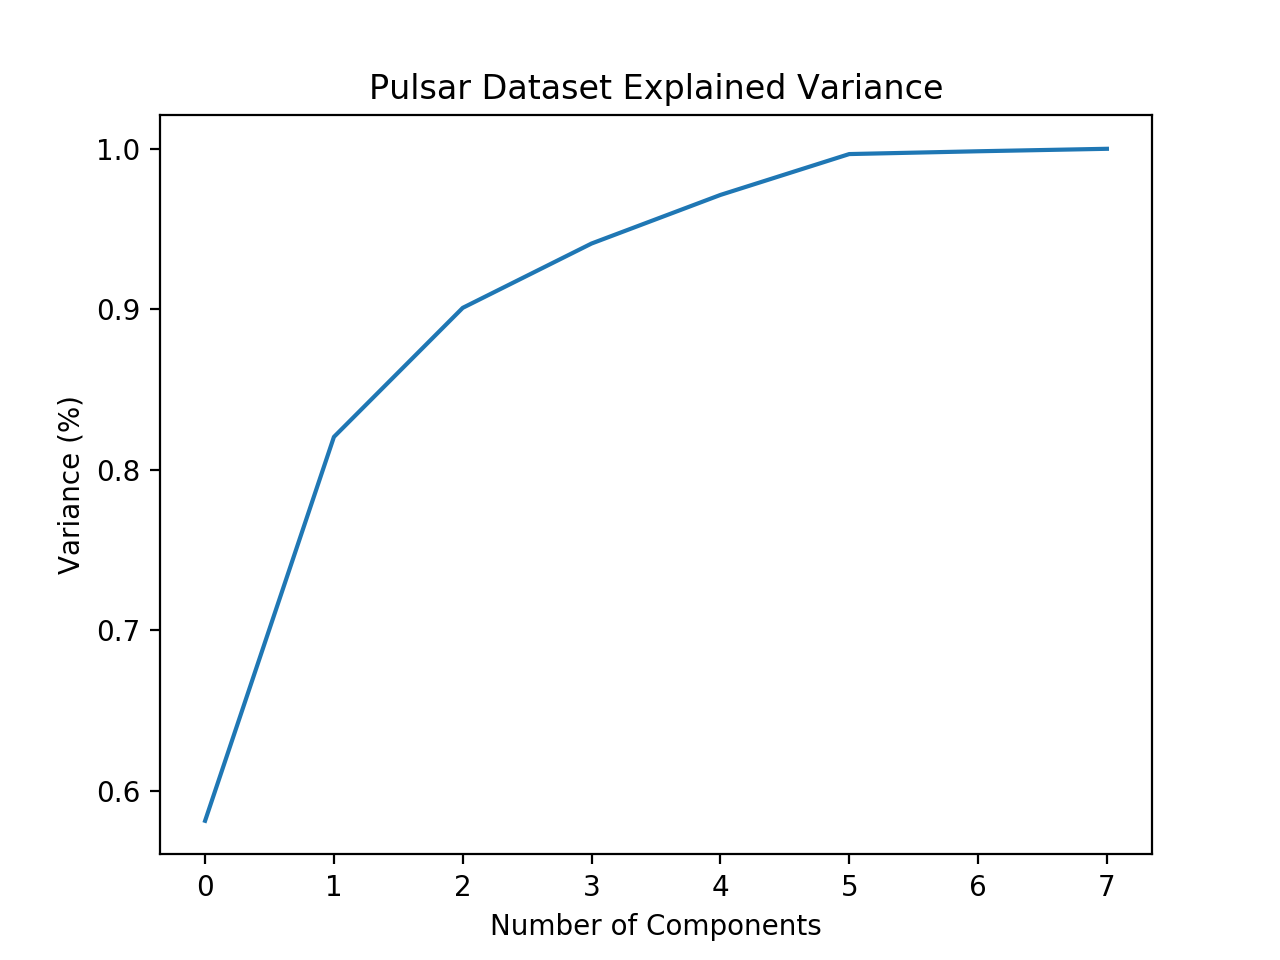

[[-2.93908021e-01 -8.16985362e-02  2.74762447e-01  2.15500904e-01
   4.08296417e-01  6.58679859e-01 -3.74415268e-01 -2.10372215e-01]
 [-6.12286776e-01 -3.64245179e-01  4.26261825e-01  3.21064225e-01
  -1.61622885e-01 -3.14722509e-01  2.35230681e-01  1.64752194e-01]
 [ 2.97594286e-02  2.01825556e-01  1.63497911e-02  2.06276512e-02
   5.62998028e-01  1.53023897e-01  4.98315734e-01  6.07442461e-01]
 [-3.61364293e-01  8.36003504e-01  1.60117356e-01 -2.16883866e-02
   9.25749383e-02 -3.01890887e-01 -1.30356153e-01 -1.66448436e-01]
 [ 2.61733767e-01 -2.42333164e-01  3.27648747e-02  2.01146765e-01
   6.41071508e-01 -5.74046983e-01 -1.94156795e-01 -2.30297712e-01]
 [ 5.37533095e-01  2.38862814e-01  4.22143021e-01  6.34434649e-01
  -2.52572972e-01  7.78107592e-02  3.65319157e-02  4.59181039e-02]
 [-2.19775996e-01  7.23501077e-02 -7.23104584e-01  6.31715957e-01
  -1.15236853e-02  4.15057299e-02  1.08669512e-01 -1.04183010e-01]
 [-3.87984827e-02  2.02036663e-04 -1.21421019e-01  8.68840701e-02
  -

In [2]:
%matplotlib notebook
# Make sure the working directory is set to project folder
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

columnnames = ['Mean_ip', 'Std_ip', 'Kurtosis_ip', 'Skew_ip', 'Mean_SNR', 'Std_SNR', 'Kurtosis_SNR', 'Skew_SNR','Class']
filepath = os.path.abspath('../data/HTRU_2.csv')
# the data comes without colum names but he
df_pulsar = pd.read_csv(filepath, names=columnnames)

# we are rescaling our data so that it stays in the range 0 to 1.
scaler = MinMaxScaler(feature_range=[0, 1])
df_rescaled = scaler.fit_transform(df_pulsar.drop(columns=["Class"])) # the last column is the target

#Fitting the PCA algorithm with our Data
pca = PCA().fit(df_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

# show the eigenvectors
print(pca.components_)
print(pca.components_[0]) # it seems that its mostly 'Mean_SNR' and 'Std_SNR' that are driving the variance.
# IMPORTANT: this is NOT a model so variance does not tell you anything about feature importance!

pca = PCA(n_components=5)
dataset = pca.fit_transform(df_rescaled)


# dataset now has become your X variables to predict your target Y (data[:, 8:])